# GD en el perceptrón

El método de gradiente descendiente es un método de optimización que se basa en observar el gradiente de una función para encontrar el mínimo de esta función. Aquí veremos cómo se puede aplicar este método al perceptrón para que pueda realizar una tarea de clasificación binaria.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

## Preparación de los datos

Usamos datos que representan un problema de clasificación binario. Utilizamos el 70 \% de los datos para el entrenamiento y el 30 para la evaluación.

In [2]:
dataset = load_breast_cancer()
X = dataset.data
Y = dataset.target

#Entrenamiento y evaluación
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

#Tamaño de los datos
#Unidades de entrada
m,n = x_train.shape

pd.DataFrame(data=X, columns=dataset.feature_names)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


## Aprendizaje por GD

Usarems el algoritmo de GD con entropía cruzada.

#### Entrenamiento de la red

Determinaremos los pesos a partir del algoritmo de gradiente descendiente:

$$\theta_i \leftarrow \theta_i - \eta \nabla_iR(\theta)$$

En este caso, la función de riesgo es:

$$R(\theta) = -\sum_x \sum_y y \log f_y(x)$$

Donde $y$ es la clase de los datos. Además, la probabilidad se determinará por la función Softmax y $\theta = \{w,b: w \in \mathbb{R}^d, b \in \mathbb{R}\}$. Por tanto:

$$\nabla_iR(\theta) = (f_y(x) - y_x) \cdot x_i$$

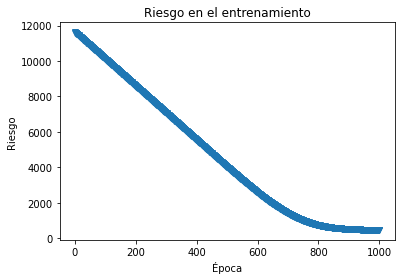

CPU times: user 458 ms, sys: 14.4 ms, total: 472 ms
Wall time: 471 ms


In [3]:
%%time

#Número de itraciones
its = 1000
#Rango de aprendizaje
lr = 1e-10

np.random.seed(0)
w = np.random.rand(n,2)/np.sqrt(n)
b = np.ones(2)

#Detenerse
stop = False
t = 0
risk = []
while  stop == False:
    #FORWARD
    #Funcion de preactivacióm
    a = np.dot(x_train,w)+b
    #Función de activación
    exp = np.exp(a-np.argmax(a))
    f = exp/exp.sum(1, keepdims=True)
    #Risk por época
    epoch_risk = -np.log(f)[range(m),y_train].sum()
    risk.append(epoch_risk)

    #Error
    err = f.copy()
    err[range(m),y_train] -= 1
    
    #Derivada
    dw = np.dot(x_train.T,err)
    db = err.sum(0)
    
    #ACTUALIZACIÓN
    #Gradiente descendiente
    w -= lr*dw
    b -= lr*db
    
    t += 1
    #Criterio de paro
    if t > its: 
        stop = True
        
plt.plot(risk, 'v-')
plt.title('Riesgo en el entrenamiento')
plt.ylabel('Riesgo')
plt.xlabel('Época')
plt.show()

Aplicación de la red a los datos: La elección de una clase se hace como:

$$\hat{y} = \arg\max_y p(Y=y|x)$$

In [4]:
#Predicción
def forward(X):
    #Pre-activación
    a = np.dot(X,w)+b
    #Activación
    exp = np.exp(a-np.argmax(a))
    f = exp/exp.sum(1,keepdims=True)
    #Clasificación
    cl = np.argmax(f, axis=1)
    
    return cl, f

In [5]:
#Evaluación
clases, probs = forward(x_test)
print(classification_report(y_test, clases))

              precision    recall  f1-score   support

           0       0.65      0.80      0.72        56
           1       0.89      0.79      0.84       115

    accuracy                           0.80       171
   macro avg       0.77      0.80      0.78       171
weighted avg       0.81      0.80      0.80       171



#### Exploración de los pesos

El perceptrón que hemos definido, determina las probabilidades para la clase 1 (gato) y la clase 0 (no gato) y elige la clase que maximice la probabilidad.

Las probabilidades de salida son:

In [6]:
pd.DataFrame(data=probs, columns=['Prob. clase 0', 'Prob. clase 1'])

,Prob. clase 0,Prob. clase 1
0,0.907282,9.271792e-02
1,0.976552,2.344762e-02
2,0.999994,5.700359e-06
3,1.000000,2.612671e-20
4,0.996672,3.327678e-03
...,...,...
166,0.655481,3.445188e-01
167,0.012710,9.872896e-01
168,0.959238,4.076193e-02
169,0.862409,1.375910e-01


Los pesos de las conexiones que ha aprendido para la clase 1 (gato) son los siguientes:

In [7]:
pd.DataFrame(data=np.append(w[:,1],b[1]), index=list(dataset.feature_names)+['bias'], columns=['Pesos'])

,Pesos
mean radius,0.130356
mean texture,0.099220
mean perimeter,0.116475
mean area,0.150177
mean smoothness,0.070005
mean compactness,0.096561
mean concavity,0.168988
mean concave points,0.015906
mean symmetry,0.152013
mean fractal dimension,0.158841
